<div style="border:solid green 2px; padding: 20px">
    
<b>Галина, привет! Это Александр Матвеевский</b> Я рад тебя видеть на финальном спринте (Проект по А/B-тестированию).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

**Анализ результатов А/В теста. Влияние новой рекомендательной системы на сайте на изменения в платежной воронке пользователей**


Цель исследования: провести оценку A\B-тестирования новой рекомендательной системы товаров для пользователей. Оценить изменились ли продажи после внедрения изменений или нет. Подтвердить или опровергнуть гипотезу, что пользователи из тестовой группы показывают рост конверсии по каждому исследуемому показателю как минимум на 5 процентов

Задача исследования: провести оценку результатов A/B-теста исходя из данных датасета с действиями пользователей, технического задания и вспомогательных датасетов: 
- оценить корректность проведения теста.
- проанализировать результаты теста.

Проверить:
- пересечение тестовой аудитории с конкурирующим тестом;
- совпадение теста и маркетинговых событий, другие проблемы временных границ теста.

Ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 5%:
- конверсии в просмотр карточек товаров — событие product_page
- просмотры корзины — product_cart
- покупки — purchase.


Содержание проекта:
- [Загрузка и подготовка данных](#the_download)
  - Импорт библиотек и загрузка датафреймов
  - Преобразование типов даннных 
  - Поиск дубликатов и пропущенных значений, оценка их природы
- [Оценка корректности проведения теста](#test_correct)
  - период набора пользователей в тест и его соответствие требованиям технического задания;
  - регион регистрации пользователей 
- [Пересечения с конкурирующим тестом](#interface_eu_test)
- [Данные пользовательской активности](#user_activity)
  - Горизонт анализа и лайфтайм совершения события пользователями 
  - Динамика набора пользователей в группы 
  - Оценка активности пользователей
  - Даты проведения теста в соотетствии с ТЗ
  - Вывод о соответствии теста требваниям ТЗ
- [Исследовательский анализ данных](#data_analysis)
  - Распределение количества событий на пользователя в разрезе групп теста
  - Динамика количества событий в группах теста по дням
  - Совпадение времени проведения теста с маркетинговыми активностями
  - Оценка активности пользователей
  - Построение продуктовой воронки 
  - Общий вывод о изменении пользовательской активности в тестовой группе по сравнению с контрольной
- [Оценка результатов A/B тестирования](#ab_results)
  - Трактовка результатов А/В тестирования и изменения конверсии 
  - Статистическая разница долей (проверка z-критерием)
- [Итоговый вывод](#conclusion)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Отличная практика - расписывать цель и техническое задание перед началом проекта.
    
Это оглавление вполне можно сделать интерактивным. Описание как это можно сделать вот тут — https://sebastianraschka.com/Articles/2014_ipython_internal_links.html  
</div>

    
<div class="alert alert-info"> <b>Комментарии студента:</b> Спасибо большое, использую информацию! У некоторых пунктов почему то ссылки не работают. Не подскажешь, в чем может быть дело?</div>
    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__


У меня работают, странно

<a id='the_download'></a>

### Загрузка и подготовка данных
#### Импорт таблиц

<a id='### Загрузка и подготовка данных'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
import math as mth
from scipy import stats as st
from statsmodels.stats.weightstats import ztest as ztest

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Хорошо, модули загружены
</div>

In [2]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 70 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# загружаем данные датасета final_ab_participants.csv
participants = pd.read_csv('/datasets/final_ab_participants.csv')

In [4]:
# выводим информацию о датасете
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [5]:
# выводим случайные 5 строк таблицы
display(participants.sample(5))

,user_id,group,ab_test
13206,C41BBCA9DACE544D,A,interface_eu_test
5556,425B4F03B08D10FC,A,recommender_system_test
9736,C586A881F11593F8,A,interface_eu_test
1998,B6E4E414699EFC1F,A,recommender_system_test
15168,B0F117EEF0615FD4,B,interface_eu_test


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__


Предлагаю разделять логически разные вещи:

    - импорты библиотек
    - открытие данных (это может быть не тривиальный процесс)
    - рабочий код
    
Такой подход позволит улучшить читаемость кода, снизит время поиска ошибок если они есть и исключит повторное выполнение кода

    
<div class="alert alert-info"> <b>Комментарии студента:</b> А мне казалось, что такой вид наоборот лаконичнее вглядит) Сейчас исправим!</div>
    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__


Не совсем. По стандартам оформления РЕР8, модули/выгрузка данных/рабочий код должен быть в разных ячейках

In [6]:
# загружаем данные датасета ab_project_marketing_events.csv
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')


In [7]:
# выводим информацию о датасете
marketing_events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [8]:
# выводим случайные 5 строк таблицы
display(marketing_events.sample(5))

,name,regions,start_dt,finish_dt
12,Single's Day Gift Promo,APAC,2020-11-11,2020-11-12
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07


In [9]:
# загружаем данные датасета final_ab_new_users.csv
users = pd.read_csv('/datasets/final_ab_new_users.csv')


In [10]:
# выводим информацию о датасете
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [11]:
# выводим случайные 5 строк таблицы
display(users.sample(5))


,user_id,first_date,region,device
51383,D4C15EAD40B645ED,2020-12-19,EU,Mac
32985,254B557786CA738D,2020-12-23,EU,Mac
29609,2D82D1C3384BD5DC,2020-12-16,EU,iPhone
11968,0622A8A1D6B7D38A,2020-12-21,EU,Mac
35180,7591676C34F21ACD,2020-12-10,EU,PC


In [12]:
# загружаем данные датасета final_ab_events.csv
events = pd.read_csv('/datasets/final_ab_events.csv')


In [13]:
# выводим информацию о датасете
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [14]:
# выводим случайные 5 строк таблицы
display(events.sample(5))

,user_id,event_dt,event_name,details
416472,BDE2468B66CF69A5,2020-12-25 14:30:02,login,NaN
391026,40A6693375A3053F,2020-12-22 15:36:22,login,NaN
118727,C18F8E6B295095EE,2020-12-26 23:46:30,product_cart,NaN
83140,D6C8B73961F2774C,2020-12-15 19:06:16,product_cart,NaN
154775,21B8318A789FACE2,2020-12-14 00:15:06,product_page,NaN


#### Присутствуют ли пропущенные значения и дубликаты: оценить их природу, коррекция датасетов. 

In [15]:
# приведение данных к нужному типу
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt']).dt.date
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt']).dt.date

In [16]:
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [17]:
# посмотрим на количество регионов и распределение пользователей: 
users['region'].value_counts()

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

In [18]:
# посмотрим на количество устройств по пользователям:
users['device'].value_counts()

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64

In [19]:
users['first_date'] = pd.to_datetime(users['first_date'])

In [20]:
events[events['details'].isna() == True]['event_name'].value_counts()

login           189552
product_page    125563
product_cart     62462
Name: event_name, dtype: int64

In [21]:
events[events['details'].isna() == True]['event_name'].value_counts().sum()


377577

В столбце details датасета events есть 377 577 пропусков. Эти пропуски не являются случайными. В данный столбец сохраняются детали события, такие как сумма совершенной покупки. Из данных мы видим, что для события purchase пропусков нет. Следовательно пропуски обсуловлены отсутстием дополнителной информации, которая бы записывалась в данный столбец при выгрузке

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Совет на будущее, смотри, не есть хорошо, когда налево и направо пытаться заполнить пропуски. В реальной работе - сейчас заменил на ноль, а через месяц забыл и среднее подсчитал. Плюс могут быть моменты, когда покупка бонусная или подарок, будет ноль стоить. В общем, если можно оставить пропуски пропусками - а тут это можно сделать, то лучше так и сделать, на результаты, даже если мы что-то захотим подсчитать - это не повлияет

In [22]:
events.duplicated().sum()

0

In [23]:
# считаем количество записей по каждому тесту: 
participants.groupby('ab_test')['user_id'].count()

ab_test
interface_eu_test          11567
recommender_system_test     6701
Name: user_id, dtype: int64

**Вывод этапа**

- датасеты users, events и participants содержат уникальные номера пользователей user_id на основе которых возможно объединение информации
- назчания колонок во всех датасетах прописаны в ожидаемом формате
в качестве преобразования все записи в датасетах приведены к нижнему регистру
- информация о датах в таблицах data_marketing_events, data_new_users, data_events приведена к типу datetime64
- пропуски присутствует только в талице data_events в колонке details = 377 577 пропусков
- дубликаты в таблицах не выявлены
- всего в датафреме фигурируют четыре региона: EU (Европейский, наибольшее количество пользователей - 46270), N.America (Северная Америка), CIS (страны постсоветского пространства), А так же APAC (Азиатско-Тихоокеанский регион). 
- Так же мы видим распределение пользователей по устройствам, которыми они пользовались (самым популярным оказася андроид): Android - 27520, PC - 15599, iPhone - 12530, Mac - 6084
- в датафрейме есть информация о двух тестах: recommender_system_test (интересующий нас) и interface_eu_test (сторонний, в котором еще и больше информации о пользователеях - 11567 против 6701)

Проведена предподготовка данных. Даты привлечения пользователей проверены на соответсвие ТЗ. Даты приведены к формату datetime. Установлено наличие неслучайных пропусков в данных

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Было бы хорошо привести более детальные выводы по категориальным данным: количество тестов (именно на этапе предобработки), регионов, устройств.
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Готово, добавила информацию)</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Ты корректно выгрузила данные и посмотрела их содержимое. Можно приступать к следующему шагу
</div>

<a id='test_correct'></a>

### Оценка корректности проведения теста

#### Выделите пользователей участвующих в тесте

In [24]:
# считаем количество записей для групп A и В для теста 'recommender_system_test'
participants.query("ab_test == 'recommender_system_test'").groupby('group')['user_id'].count()

group
A    3824
B    2877
Name: user_id, dtype: int64

Данные об искомом тесте recommender_system_test присутствуют 6 701 запись, разделение на группы в тесте также есть.
Присутствует верное название теста recommender_system_test, в таблице есть данные по конкурирующему тесту interface_eu_test
Видимо группа А — контрольная, B — новая платёжная воронка.

In [25]:
print (users['first_date'].min())
print (users['first_date'].max())

2020-12-07 00:00:00
2020-12-23 00:00:00


Даты регистрации в таблице с новыми пользователями соответствуют ТЗ, но окончание регистрации на 2 дня позже заявлянного в условии). Поэтому сделаем фильтр, чтобы сохранились только пользователи с регистрацией до 21.12.2020 включительно: 

In [26]:

part_users = users.merge(participants.query('ab_test == "recommender_system_test"'), on='user_id')
part_users.head()


,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test
3,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
4,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test


In [27]:
print (part_users['first_date'].max())

2020-12-21 00:00:00


<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


По сути срез корректный (его нужно оставить).
    
Но выше ты смотришь на все логи, они могут хоть за 10 лет быть. Проверять на ТЗ мы должны только данные, которые относятся к нашему тесту.. В данном случае, у тебя получается, что набор новых пользователей был осуществлён 23 числа и мы можем грешить на инженеров. Но давай посмотрим именно дату остановки набора именно нашего теста? Для этого объединим таблицы participants с нужным тестом и new_users. И посмотрим на окончание теста? Соответствует ли оно заданию?
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Вот это да, а получается, что дата соответствует тз) Спасибо за рекомендацию! </div>
    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Верно, и теперь мы не ругаем инженеров, а наоборот - хвалим)
</div>

In [28]:
# делаем фильтр до 21 декабря, но как будто можно обойтись и без фильтрации: 
new_users = users[users['first_date'] <= "2020-12-21 00:00:00"]

Проверим себя: Сделаю фильтр по recommender_system_test тесту и уточню, что новые пользователи набирались в соответствии датой окончания набора по ТЗ: 

In [29]:
# фильтр по нужному нам тесту
recom_users = users[users['user_id'].isin(participants.query('ab_test == "recommender_system_test"')['user_id'])]


In [30]:
# проверяем даты запуска теста и дата окончания набора новых пользователей
display(recom_users['first_date'].min())
recom_users['first_date'].max()

Timestamp('2020-12-07 00:00:00')

Timestamp('2020-12-21 00:00:00')

In [31]:
users['first_date'].max()

Timestamp('2020-12-23 00:00:00')

Максимальная дата нашего теста сходится с ТЗ. Даты запуска теста и дата окончания набора новых пользователей верны - 7 и 21 декабря 2020. 

#### регион регистрации пользователей: все ли попавшие в тест пользователи представляют целевой регион и составляет ли общее количество пользователей из целевого региона 15% от общего числа пользователей из целевого региона, зарегистрированных в период набора пользователей в тест

In [32]:
print(recom_users['region'].value_counts())
print(new_users['region'].value_counts())

EU           6351
N.America     223
APAC           72
CIS            55
Name: region, dtype: int64
EU           42340
N.America     8347
CIS           2900
APAC          2883
Name: region, dtype: int64


In [33]:
# Считаем процент пользователей из EU
round((recom_users.query('region == "EU"')['region'].count()/new_users.query('region == "EU"')['region'].count())*100,2)


15.0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Ты верно посчитала этот пункт
</div>

Аудитория теста состоит из пользвателей из Европы, Северной Америки, Азии и региона тихого океана, а так же постсоветстких республик. Преобладают пользователи из Европы. По ТЗ сказано, что аудиторией теста должны быть 15% новых пользователей из региона EU, по данным видно, что аудитория из Европы составляет 6351 из всех 43340 новых клиентов с этого региона, что соответствует ТЗ в 15%.

Вывод:

Название теста верное - recommender_system_test, в таблице есть данные по конкурирующему тесту interface_eu_test
Группа А — контрольная, B — новая платёжная воронка.
Даты запуска теста и дата окончания набора новых пользователей верны - 7 и 21 декабря 2020
Дата последнего события - 30 декабря 2020, по ТЗ тест должен длится до 4 января 2021
Аудитория теста - это в основном пользователи из Европы, также присутствуют пользователи из других стран. По ТЗ сказано, что аудиторией теста должны быть 15% новых пользователей из региона EU, по данным видно, что аудитория из Европы составляет 6351 из всех 43340 новых клиентов с этого региона, что соответствует ТЗ в 15%.

<a id='#interface_eu_test'></a>

### Пересечения с конкурирующим тестом
#### Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.

In [34]:
participants['user_id'].nunique()

16666

In [35]:
participants.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
interface_eu_test       A         5831
                        B         5736
recommender_system_test A         3824
                        B         2877

In [36]:
# проверим равномерность распределения пользователей по тестовым группам 
participants.query('ab_test == "recommender_system_test"')['group'].value_counts()

A    3824
B    2877
Name: group, dtype: int64

В группе А теста  - 3634 человек, а в группе В - 2717 человек, всего 6351 человек. Группы делятся не равномерно - 57% (А) и 43% (В).

In [37]:
tests = participants.groupby('user_id').agg({'ab_test': 'nunique'}).sort_values(by = 'ab_test', ascending = False).reset_index()
# добавили к бзерам количество тестов, в которое они входят (1 или 2)
two_test = tests.loc[tests['ab_test'] == 2]
users_two_test = two_test['user_id']
# выделила отдельно список пользователей, которые входят в 2 теста одновременно
len(two_test)

1602

1602 пользователя входят в оба теста. Посмотрим, как эти пользователи распределяются по группам в обоих тестах: 

In [38]:
users_two_test = participants.query('user_id in @users_two_test').reset_index(drop=True)
# обрезали данные дублирующимся пользователям
users_two_test.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})
# вывели в какие группы входят наши пользователи

user_id
ab_test                 group         
interface_eu_test       A          819
                        B          783
recommender_system_test A          921
                        B          681

Видно, что есть пользователи, которые также входят в обе группы recommender_system_test теста. Нельзя отрицать, что этот пользователь может входить в групу А или В теста interface_eu_test, а так же в А или В группу recommender_system_test теста. Проверим, как пользователи группы B из теста interface_eu_test распределены по группам в тесте recommender_system_test: 

In [39]:
# смотрим на распределние пользователей из гр В
df_test_B = participants[participants['user_id'].duplicated()].query('group == "B"')['user_id']
(participants[participants['user_id'].isin(df_test_B)]\
                                     .query('ab_test == "recommender_system_test"')['group']\
                                     .value_counts())

A    439
B    344
Name: group, dtype: int64

Вывод: Можно заметить практически равномерное распределение пользователей группы B теста interface_eu_test в нашем тесте recommender_system_test (439 против 344, разница около 6%). Делаем вывод, что тест interface_eu_test одинаково влиял на recommender_system_test для групп А и В. Вероятно, это влияние не должно отразиться на итоговом результате - конверсии в группе В к группе А. Далее проверим присутствуют ли пользователи, входящие в обе группы А и В теста recommender_system_test: 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верное наблюдение.

В данной ситуации, наиболее корректным решением будет проверить в какие именно группы теста interface_eu_test попали пользователи теста recommender_system_test. Ведь если они попали только в контрольную группу - это значит, что тест interface_eu_test никак на них не повлиял

In [40]:
participants.query('ab_test == "recommender_system_test"')['user_id'].duplicated().sum()


0

Мы не обнаружили таких пользователей. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Да, внутри теста всё хорошо

<a id='user_activity'></a>

### Данные пользовательской активности

#### Рассчитаем горизонт анализа, лайфтайм совершения события пользователем после регистрации и отфильтруем датафрейм: 

In [41]:
# объединяем таблицы 
recom_users_ab = recom_users.merge(participants.query('ab_test == "recommender_system_test"'), on='user_id')
display(recom_users_ab.user_id.nunique())
recom_users_ab = recom_users_ab.merge(events, how='left', on='user_id')
display(recom_users_ab.user_id.nunique())

6701

6701

Приведем столбец датафрейма recom_users_ab['event_dt'] к корректному формату и установим фильтр в 14 дней в соответствии с горизонтом событий: 

In [42]:
recom_users_ab['event_dt'] = pd.to_datetime(recom_users_ab['event_dt'])


In [43]:
# делаем фильтр в 14 дней

#горизонт событий - 14 дней, 
#последняя дата наблюдения - 4 января, 
#последняя подходящая для анализа дата (4 января - 14 дней) 

horizon_days = 14
observation_date = datetime(2021, 1, 4).date()
last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days)

#фильтруем по дате последнего набора пользователей 
#добавляем лайфтайм пользователя
#делаем по нему фильтр в 14 дней 
display(recom_users_ab.user_id.nunique())
test_1 = recom_users_ab
recom_users_ab = recom_users_ab.query('event_dt <= @last_suitable_acquisition_date')
display(recom_users_ab.user_id.nunique())
recom_users_ab['lifetime'] = (recom_users_ab['event_dt'] - recom_users_ab['first_date']).dt.days
recom_users_ab = recom_users_ab.query('lifetime <= 14')
print(recom_users_ab.user_id.nunique())


6701

3165

3165


/tmp/ipykernel_387/4136099817.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recom_users_ab['lifetime'] = (recom_users_ab['event_dt'] - recom_users_ab['first_date']).dt.days


In [44]:
last_suitable_acquisition_date

datetime.date(2020, 12, 21)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от  тимлида №1__

По ТЗ дата остановки набора новых пользователей: 2020-12-21. Нам следует отфильтровать события с лайфтаймом больше, чем горизонт событий. (т.е. удалить строки, в которых события больше 14 дней)
    
    
    
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b>Кажется, исправила. Посмотри пожалуйста!</div>
    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Корректная реализация. Молодец!
</div>

In [45]:
recom_users_ab.lifetime.nunique()

14

*вывод:*

- Мы оценили список участников нашего теста - recommender_system_test,а так же в датафрейме увиделиинформацию по конкурирующему тесту interface_eu_test

- Мы предполагаем, что группа А — контрольная, B имеет нововведения.

- Даты запуска теста и дата окончания набора новых пользователей верны - 7 и 21 декабря 2020 (по нашему тесту не потребовали коррекции)

- Аудитория теста: преобладают пользователи из Европы, также присутствуют пользователи из других регионов. По ТЗ сказано, что аудиторией теста должны быть 15% новых пользователей из региона EU, по данным видно, что аудитория из Европы составляет 6351 из всех 43340 новых клиентов с этого региона, что соответствует ТЗ в 15%.

- Можно заметить практически равномерное распределение пользователей группы B теста interface_eu_test в тесте recommender_system_test (разница около 6%). Можно констатировать, что тест interface_eu_test одинаково влиял на recommender_system_test для групп А и В. Следовательно, это влияние не должно отразиться на итоговом результате - конверсии в группе В к группе А.

#### Оцените динамику набора пользователей в группы теста и проверьте равномерность распределения пользователей по группам теста и корректность их формирования, а так же изобразим графически: 

In [46]:
test_1.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN
2,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test,NaT,NaN,NaN
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN


In [47]:
# фильтруем пользователей, которые прошли только регистрацию
test_2 = test_1[test_1['event_dt'].isna()]
test_2 = (test_2.groupby(['first_date','group'], as_index=False)['user_id'].nunique()
                            .rename(columns={'user_id':'users_count'}))
test_2

,first_date,group,users_count
0,2020-12-07,A,204
1,2020-12-07,B,96
2,2020-12-08,A,107
3,2020-12-08,B,115
4,2020-12-09,A,65
5,2020-12-09,B,26
6,2020-12-10,A,133
7,2020-12-10,B,159
8,2020-12-11,A,73
9,2020-12-11,B,91


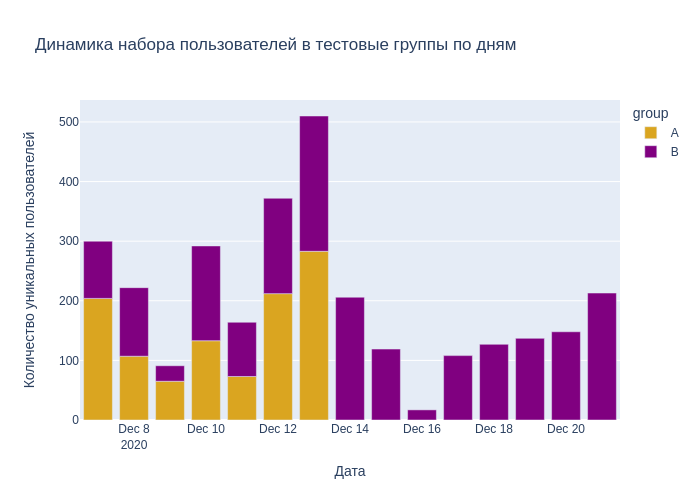

In [48]:
fig = px.bar(test_2, x='first_date', y='users_count', color='group', 
             title='Динамика набора пользователей в тестовые группы по дням', 
             color_discrete_sequence=["goldenrod", "purple"])
fig.update_xaxes(title_text='Дата')
fig.update_yaxes(title_text='Количество уникальных пользователей')

fig.show("png")


In [49]:
test_2['users_count'].sum()

3026

ВЫВОД:

По графику определяем, что после 14 декабря набор происходит только в группу B. Таких пользователей можно отфильтровать

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верное наблюдение! 

#### Изучим активность пользователей: все ли зарегистрированные пользователи прошли авторизацию и совершали переход по продуктовой воронке; если есть пользователи, которые не совершали событий после регистрации, изучите их количество и распределение между группами теста; сделайте вывод о необходимости учитывать пользователей без событий при изучении результатов теста;

Изучим количество событий по пользователям:  

In [50]:
users_events = (recom_users_ab.groupby(['user_id', 'event_name'], as_index=False)['region'].count()
                              .rename(columns={'region':'events_count'})
                              .merge(recom_users_ab[['user_id', 'group']], on='user_id')
                              .drop_duplicates())
users_events.head()


,user_id,event_name,events_count,group
0,001064FEAAB631A1,login,1,B
2,001064FEAAB631A1,product_page,1,B
4,0010A1C096941592,login,2,A
10,0010A1C096941592,product_page,2,A
16,0010A1C096941592,purchase,2,A


Определим количество событий по группам: 

In [51]:
users_events_group = (users_events.groupby(['group', 'event_name'], as_index=False)['events_count'].agg('sum'))
users_events_group['event_by_user'] = 0

In [52]:
users_events_group.head()

,group,event_name,events_count,event_by_user
0,A,login,5047,0
1,A,product_cart,1529,0
2,A,product_page,3207,0
3,A,purchase,1515,0
4,B,login,1865,0


А теперь определим количество оставшихся в тесте пользователей в группах А и В: 

In [53]:
users_A = recom_users_ab.query('group == "A"')['user_id'].nunique()
users_B = recom_users_ab.query('group == "B"')['user_id'].nunique()

In [54]:
print("Пользователей из группы А:", users_A)
print("Пользователй из группы B:", users_B)

Пользователей из группы А: 2330
Пользователй из группы B: 835


Разница по количеству пользователей, при оценки пользовательских событий, стала ещё более ощутимой. Группа А - 2747 человек, B - 928 человек.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Равный размер групп дает оптимальную длительность теста, но, вообще, группы просто должны быть достаточно большими и не обязательно равными.
    
---
    
Вот здесь подробно расписано, что не все так страшно в несбалансированных выборках
    
https://medium.com/statistics-experiments/%D0%B4%D0%B8%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81-%D0%B2-a-b-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-%D0%B5%D1%81%D1%82%D1%8C-%D0%BB%D0%B8-%D1%80%D0%B0%D0%B7%D0%BD%D0%B8%D1%86%D0%B0-%D0%BC%D0%B5%D0%B6%D0%B4%D1%83-99-1-%D0%B8-50-50-%D0%B2-%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%85-11c8f4fe7eb4
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Большое спасибо, а я очень боялась сравнения разноразмерных выборок)Чекнула ссылку - сайт не загружается(</div>
    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

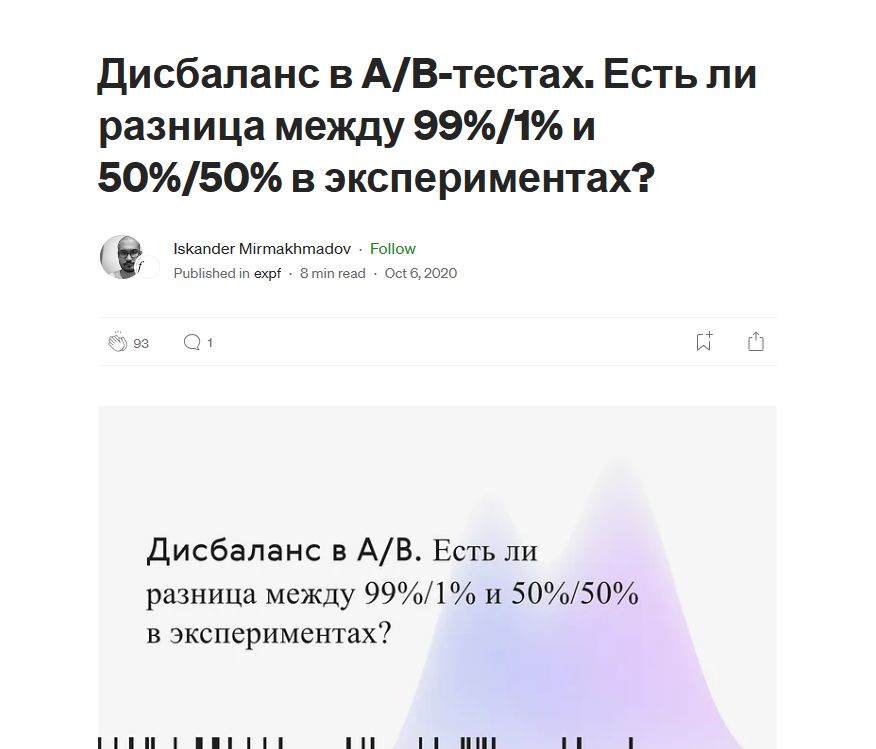 Работает. Возможно некоторые провайдены блокируют и только через vpn

<a id='data_analysis'></a>

### Исследовательский анализ данных

#### Распределение количества событий на пользователя в разрезе групп теста

In [55]:
users_events_group.loc[users_events_group['group'] == 'A', 'event_by_user'] = (
    users_events_group['events_count'] / users_A)

users_events_group.loc[users_events_group['group'] == 'B', 'event_by_user'] = (
    users_events_group['events_count'] / users_B)
users_events_group

,group,event_name,events_count,event_by_user
0,A,login,5047,2.166094
1,A,product_cart,1529,0.656223
2,A,product_page,3207,1.376395
3,A,purchase,1515,0.650215
4,B,login,1865,2.233533
5,B,product_cart,512,0.613174
6,B,product_page,1019,1.220359
7,B,purchase,486,0.582036


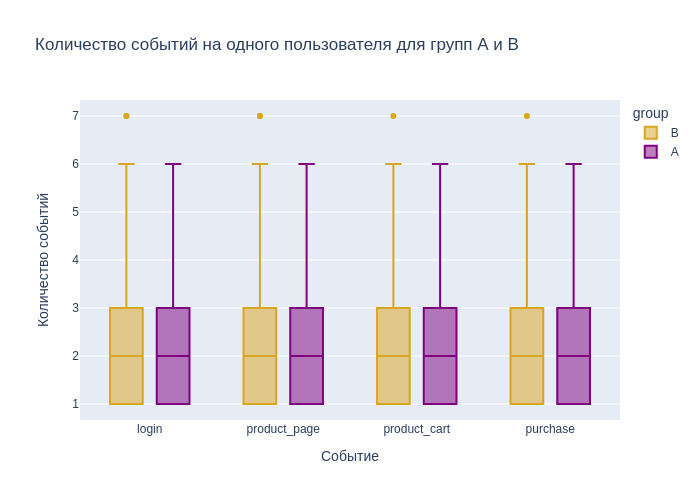

In [56]:
fig = px.box(users_events, x="event_name", y="events_count", color="group",
             title="Количество событий на одного пользователя для групп А и В", color_discrete_sequence=['goldenrod', 'purple'])

fig.update_xaxes(title_text='Событие')
fig.update_yaxes(title_text='Количество событий')

fig.show("png")

Вывод: 

- Среднее количество событий login на одного клиента практически не различается между группами (A 2.15 и  B 2.21)
- При анализе остальных событий, группа А значительно опережает группу В: 
   - product_page - просмотр страницы товара (А - 1.37, B - 1.2)
   - product_cart - Добавление товара в корзину (А - 0.64, В - 0.61)
   - purchase - Покупка (А - 0.65, В - 0.57)
- Конверсия группы А выше, чем у группы В. Ожидаемый прирост в 5% не наблюдается.

#### Динамика количества событий в группах теста по дням: изучите распределение числа событий по дням и сравните динамику групп теста между собой.


In [57]:
recom_users_ab.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,lifetime
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN,0
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN,0
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN,1
5,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN,3


In [58]:
recom_users_ab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15180 entries, 0 to 27720
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     15180 non-null  object        
 1   first_date  15180 non-null  datetime64[ns]
 2   region      15180 non-null  object        
 3   device      15180 non-null  object        
 4   group       15180 non-null  object        
 5   ab_test     15180 non-null  object        
 6   event_dt    15180 non-null  datetime64[ns]
 7   event_name  15180 non-null  object        
 8   details     2001 non-null   float64       
 9   lifetime    15180 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [59]:
recom_users_ab['event_dt'] = pd.to_datetime(recom_users_ab['event_dt']).dt.date

In [60]:
events_by_date = (recom_users_ab.groupby(['event_dt', 'group'], as_index=False)['user_id'].count()
                                .rename(columns={'user_id':'events_count'}))
events_by_date.sort_values(by=['events_count'], ascending=False)


,event_dt,group,events_count
26,2020-12-20,A,1528
24,2020-12-19,A,1506
22,2020-12-18,A,1312
20,2020-12-17,A,1252
16,2020-12-15,A,1084
14,2020-12-14,A,1083
18,2020-12-16,A,1069
4,2020-12-09,A,385
19,2020-12-16,B,385
1,2020-12-07,B,378


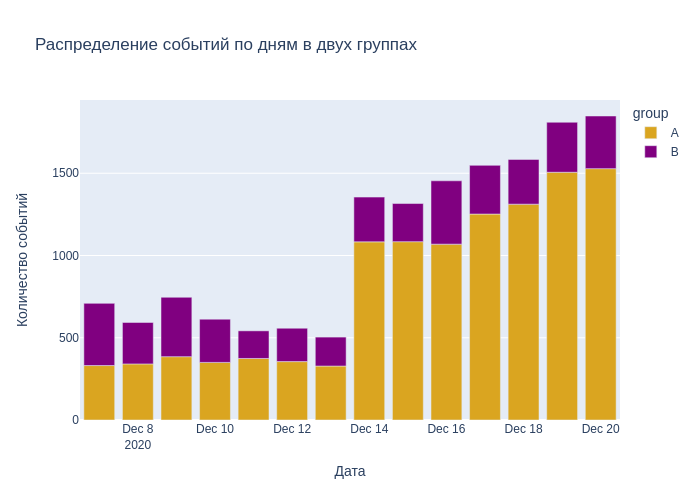

In [61]:
# отобразим на графике
fig = px.bar(events_by_date, x='event_dt', y='events_count', color='group', 
             title='Распределение событий по дням в двух группах', 
             color_discrete_sequence=['goldenrod', 'purple'])
fig.update_xaxes(title_text='Дата')
fig.update_yaxes(title_text='Количество событий')

fig.show("png")

ВЫВОД:

- Пик событий приходится на 21 декабря (1995 в А и 404 событий в В)
- Только в первый день теста в группе В было больше событий, чем в группе А (378 против 331 события). В остальных днях группа А опережала группу В по количеству событий.
- С 14 декабря наблюдаем резкий рост количества событий для группы А.

Теперь определим и изобразим графически распределение пользователей по дням в двух группах: 

In [62]:
users_by_date = (recom_users_ab.groupby(['event_dt', 'group'], as_index=False)['user_id'].nunique()
                .rename(columns={'user_id':'users_count'}))
users_by_date.sort_values(by=['users_count'], ascending=False)


,event_dt,group,users_count
26,2020-12-20,A,668
24,2020-12-19,A,650
22,2020-12-18,A,573
20,2020-12-17,A,545
14,2020-12-14,A,488
16,2020-12-15,A,473
18,2020-12-16,A,471
8,2020-12-11,A,185
4,2020-12-09,A,178
10,2020-12-12,A,174


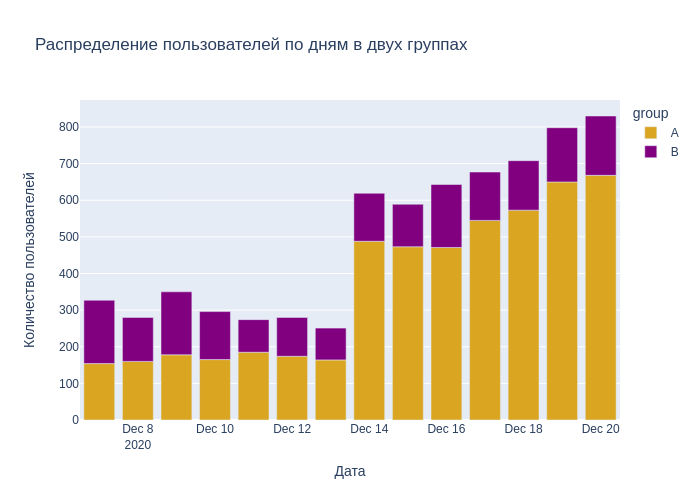

In [63]:
fig = px.bar(users_by_date, x='event_dt', y='users_count', color='group', 
             title='Распределение пользователей по дням в двух группах',
             color_discrete_sequence=['goldenrod', 'purple'])
fig.update_xaxes(title_text='Дата')
fig.update_yaxes(title_text='Количество пользователей')

fig.show("png")

ВЫВОД:

- Аналогично графику распределения событий по дням в двух группах мы видим картину распределения пользователей. 
- Резкий рост количества событий с 14 декабря - это логичное явление, пропорционально возрастает количество событий, как следствие увеличения количества пользователей. 
- Наибольшее количество пользователей в группе В приходится на 21.12.2020, однако в этот день в группе А 875 пользователей. 

In [64]:
recom_users_ab['event_dt'].max()

datetime.date(2020, 12, 20)

#### Совпадение времени проведения теста с маркетинговыми активностями

In [65]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])


In [66]:
marketing_events.query('"2020-12-07" < start_dt < "2021-01-03"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


ВЫВОД:
- Во время проведения теста было два маркетинговых кампании. Но только одна затронула EU сегмент.
- Акция Christmas&New Year Promo может оказать большее влияние, т.к. даты её проведения попадают в исследуемый период с 12 декабря - по 4 января, плюс эта акция проводится в регионе EU, именно этот регион преобладает в тесте.
- Вероятно как раз с 14 декабря начинается активная подготовка к новогодним праздникам, вследствие чего увеличивается количество событий и пользователей. 
- Кампания Christmas&New Year Promo началась после того, как мы набрали новых пользователей. Это значит, что кампания не повлияла на приход пользователей, но повлияла на поведение пользователей после окончания набора пользолвателей



<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

События, праздники и тп - влияют на две группы одинаково. Это просто изменение качества пользователей, но относительную конверсию группы В к группе А - не будет иметь воздействие. Но это нужно учитывать при изучении абсолютных данных.
</div>

#### Построение продуктовой воронки
Постройте простые продуктовые воронки для двух групп теста с учетом логической последовательности совершения событий; изучите изменение конверсии в продуктовой воронке тестовой группы, по сравнению с контрольной: наблюдается ли ожидаемый эффект увеличения конверсии в группе В, относительно конверсии в группе А?

В первую очередь назначу переменные для создания воронки, которые будут соответствовать группе А и В:

In [67]:
funnel_A = recom_users_ab[recom_users_ab['group']=="A"].groupby('event_name').agg({'event_name':'count', 'user_id':'nunique'})
funnel_A.columns = ['event_count','user_count']
funnel_A = funnel_A.sort_values(by = 'event_count', ascending = False).reset_index().reindex([0,1,3,2])

funnel_B = recom_users_ab[recom_users_ab['group']=="B"].groupby('event_name').agg({'event_name':'count', 'user_id':'nunique'})
funnel_B.columns = ['event_count','user_count']
funnel_B = funnel_B.sort_values(by = 'event_count', ascending = False).reset_index()
print('группа А', funnel_A)
print('группа B', funnel_B)

группа А      event_name  event_count  user_count
0         login         5047        2330
1  product_page         3207        1504
3      purchase         1515         734
2  product_cart         1529         704
группа B      event_name  event_count  user_count
0         login         1865         834
1  product_page         1019         472
2  product_cart          512         234
3      purchase          486         230


Построим графически наглядную воронку конверсии событий по группам: 

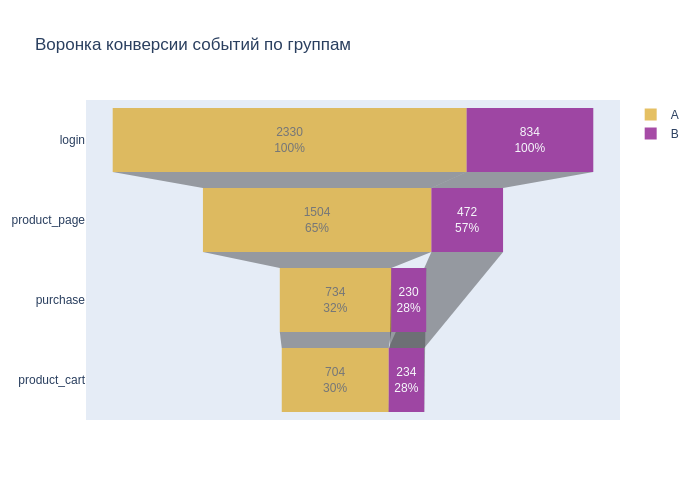

In [68]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = funnel_A['event_name'],
    x = funnel_A['user_count'],
    opacity = 0.7, marker = {"color": ["goldenrod", "goldenrod", "goldenrod", "goldenrod"]},
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    orientation = "h",
    y = funnel_B['event_name'],
    x = funnel_B['user_count'],
    opacity = 0.7, marker = {"color": ["purple", "purple", "purple", "purple"]},
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.update_layout(title_text = 'Воронка конверсии событий по группам')
fig.show("png")

#### ВЫВОД:

Исходя из количества событий, можно предположить что каждый пользователь проходит следующую последовательность:

- Авторизируется на сайте login
- смотрит страницу товараproduct_page
- смотрит страницу с корзиной покупокproduct_cart
- совершает покупки purchase

- До покупки доходят 32% пользователей группы А и 28% пользователей группы В. 
- Минимальная разница в конверсии между product_cart(добавлением товара в корзину) и purchase(покупка): разница в 2% у группы А, у группы В нет разницы. Как будто в группе А возможно не добавляя товар в корзину сразу его купить, а видимо из группы В убрали такую возможность, но сам переход от добавления товара в корзину до покупки сделали удобным. 
- Наибольшее падение коверсии между login(регистрация) и product_page(просмотром страницы товара) уровнями :-35% у группы А и -46% у группы В. Вероятно пройти регистрацию на сайт непросто или выпадают какие-то ошибки, причем в версии для В-группы ситуация усугубилась еще больше. Вопрос к UX/UI специалистам?

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Воронка построена корректно и здорово, что заметила данный нюанс. Это может говорить о том, что на платформе нестрогая воронка продаж и можно приобрести продукт минуя некоторые этапы 
</div>

<a id='conclusion'></a>

### Оценка результатов A/B тестирования

#### Трактовка результатов А/В тестирования и изменения конверсии 

In [69]:
recom_users_ab['event_dt'] = pd.to_datetime(recom_users_ab['event_dt'])

In [70]:
recom_users_ab.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,lifetime
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,product_page,NaN,0
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,login,NaN,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07,product_page,NaN,0
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08,product_page,NaN,1
5,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10,product_page,NaN,3


создаем табличку по столбцам 'lifetime', 'group', 'event_name' и с кол-вом событий: 

In [71]:
recom_users_ab

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,lifetime
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,product_page,NaN,0
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,login,NaN,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07,product_page,NaN,0
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08,product_page,NaN,1
5,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10,product_page,NaN,3
...,...,...,...,...,...,...,...,...,...,...
27710,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test,2020-12-20,product_page,NaN,0
27712,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test,2020-12-20,login,NaN,0
27714,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-20,purchase,4.99,0
27717,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-20,product_page,NaN,0


In [72]:
conversion = (recom_users_ab.groupby(['lifetime', 'group', 'event_name'], as_index=False)['user_id'].count()
                  .rename(columns={'user_id':'events_count'}))
conversion.head()

,lifetime,group,event_name,events_count
0,0,A,login,2321
1,0,A,product_cart,703
2,0,A,product_page,1501
3,0,A,purchase,731
4,0,B,login,818


Посмотрим на количесвто пользователей, которые проходят через воронку продаж и количество ползователей по группам:  

In [73]:
users_bygroup = recom_users_ab.groupby('group')['user_id'].nunique()
users_bygroup

group
A    2330
B     835
Name: user_id, dtype: int64

In [74]:
event_group_test = recom_users_ab.pivot_table(index='event_name', columns='group',values='user_id',aggfunc='nunique').reset_index()
event_group_test

group,event_name,A,B
0,login,2330,834
1,product_cart,704,234
2,product_page,1504,472
3,purchase,734,230


Создадим датафрейм с событиями product_page, добавим рассчет количества событий и посмотрим на рост количества событий типа product_page для двух групп за 14 дней лайфтайма:

In [75]:
product_pages = conversion.query('event_name == "product_page"')

product_pages['events_cumsum'] = product_pages.groupby('group')['events_count'].cumsum()

a_product_pages = round((product_pages.iloc[-2]['events_cumsum'] - product_pages.iloc[0]['events_cumsum']) 
                        / product_pages.iloc[0]['events_cumsum'], 3) 
b_product_pages = round((product_pages.iloc[-1]['events_cumsum'] - product_pages.iloc[1]['events_cumsum']) 
                        / product_pages.iloc[1]['events_cumsum'], 3) 

/tmp/ipykernel_387/4125252134.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Повторим аналогичные подсчеты для события типа product_cart: 

In [76]:
product_carts = conversion.query('event_name == "product_cart"')
product_carts['events_cumsum'] = product_carts.groupby('group')['events_count'].cumsum()


a_product_carts = round((product_carts.iloc[-2]['events_cumsum'] - product_carts.iloc[0]['events_cumsum']) 
                        / product_carts.iloc[0]['events_cumsum'], 3) 
b_product_carts = round((product_carts.iloc[-1]['events_cumsum'] - product_carts.iloc[1]['events_cumsum']) 
                        / product_carts.iloc[1]['events_cumsum'], 3)


/tmp/ipykernel_387/147495248.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Повторим аналогичные подсчеты для события типа purchases: 

In [77]:
purchases = conversion.query('event_name == "purchase"')
purchases['events_cumsum'] = purchases.groupby('group')['events_count'].cumsum()

a_purchases = round((purchases.iloc[-2]['events_cumsum'] - purchases.iloc[0]['events_cumsum']) 
                     / purchases.iloc[0]['events_cumsum'], 3) 
b_purchases = round((purchases.iloc[-1]['events_cumsum'] - purchases.iloc[1]['events_cumsum']) 
                    / purchases.iloc[1]['events_cumsum'], 3)

/tmp/ipykernel_387/2224099934.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Выведем полученные результаты: 

In [78]:
print("Группа А - просмотр страницы товара:", a_product_pages)
print("Группа B - просмотр страницы товара:", b_product_pages, end='\n\n')
print("Группа A - добавление товара в корзину:", a_product_carts)
print("Группа B - добавление товара в корзину:", b_product_carts, end='\n\n')
print("Группа А - покупки:", a_purchases)
print("Группа B - покупки:", b_purchases)

Группа А - просмотр страницы товара: 1.137
Группа B - просмотр страницы товара: 1.22

Группа A - добавление товара в корзину: 1.175
Группа B - добавление товара в корзину: 1.236

Группа А - покупки: 1.073
Группа B - покупки: 1.141


ВЫВОД: 
- За время А/В теста контрольная группа пользователей опережает группу В

- Посмотрим, как с момента регистрации пользователя происходил рост просмотров страницы товара:
  - Группа А - рост на 12,8%
  - Группа B - рост на 20%
- Добавление товара в корзину, рост за 2 недели с момента регистрации пользователя:
  - Группа А - рост на 16%
  - Группа B - рост на 26,8%
- Покупка товара за 2 недели:
  - Группа А - рост на 8,4 %
  - Группа B - рост на 12,3%
  
- Создается впечатление, что внедрение новой рекомендательной системы создает неочевидные барьеры для пользователей, которые препятсвуют пользоваться сайтом (рекомендуем обратиться к разработчикам и ux/ui специалистам)

#### Статистическая разница долей (проверка z-критерием)

- Перейдем к сравнению пропорций для основных метрик: product_page, product_cart и purchase при помощи z-критерия.
  - Н0: Доли значений метрик в группах равны
  - Н1: Доли значений метрик в группах не равны
- количество пользователей в группах отличается, то будем проверять z-критерием количество событий на одного пользователя, чтобы компенсировать разницу по количеству пользователей в группах.
- Необходимо задать критический уровень, мы проведем одновременно 4 теста. Старшие коллеги подсказали, что стоит для исключения ошибки первого рода( т.е. отвергнута верная нулевая гипотеза об отсутствии связи между явлениями или искомого эффекта) применить поправку Дана-Шидака:

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпретация нулевой и альтернативной гипотез
</div>

In [79]:
sh_alpha = 1 - (1 - 0.05)**(1/4)


In [80]:
def z_test(group1, group2, alpha):
    for i in event_group_test.index:
        p1 = event_group_test[group1][i] / users_bygroup[group1]
        # пропорция успехов во второй группе:
        p2 = event_group_test[group2][i] / users_bygroup[group2]
        
        print(event_group_test[group1][i], event_group_test[group2][i], users_bygroup[group1], users_bygroup[group2])
        # пропорция успехов в комбинированном датасете:
        p_combined = ((event_group_test[group1][i] + event_group_test[group2][i]) / 
                      (users_bygroup[group1] + users_bygroup[group2]))
        # разница пропорций в датасетах
        difference = p1 - p2
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/users_bygroup[group1] + 1/users_bygroup[group2]))
        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('{} p-значение: {}'.format(event_group_test['event_name'][i], p_value))
        if (p_value < alpha):
            print("Отвергаем нулевую гипотезу: доли значений метрик в группах не равны")
        else:
            print("Не получилось отвергнуть нулевую гипотезу, доли метрик в группах равны")
        print('')
        
z_test("A", "B", sh_alpha)


2330 834 2330 835
login p-значение: 0.0947772466553316
Не получилось отвергнуть нулевую гипотезу, доли метрик в группах равны

704 234 2330 835
product_cart p-значение: 0.2342934579445599
Не получилось отвергнуть нулевую гипотезу, доли метрик в группах равны

1504 472 2330 835
product_page p-значение: 4.0076865072125045e-05
Отвергаем нулевую гипотезу: доли значений метрик в группах не равны

734 230 2330 835
purchase p-значение: 0.03302128026729756
Не получилось отвергнуть нулевую гипотезу, доли метрик в группах равны



<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

А откуда была взята функция для z-test? Посмотри, пожалуйста, пример в тренежере в "Принятии решений". Там дан корректный z-test

<div class="alert alert-info"> <b>Комментарии студента:</b> Запуталась, но кажется получилось</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

 

Здорово, что ты знаешь о такого рода поправках и успешно используешь в своем проекте!
    
Также можно отметить, что с уменьшением уровня значимости, но уменьшается и мощность теста,  тем самым увеличивается вероятность ошибки второго рода. Такой вот компромисс

Это довольно распространенная тема, поэтому рекомендую ознакомиться более подробно - https://youtu.be/qbbY7ubzDoE.

</div>

ВЫВОД:
Для product_pages p-value < sh_alpha, значит мы можем опровергнуть нулевую гипотезу и считаем, что доли значений метрик в группах не равны. 
Для product_carts, login и purchases p-value > sh_alpha, мы считаем, что нулевая гипотеза верна и нет значимой разницы между долями. 

<a id='conclusion'></a>

### Итоговый вывод

Общий вывод:
Первое, на что стоит обратить внимание - это то, что количество пользователей в группах А и В было разным.
В группе А присутствует 3824 человека
В группе В - 2877 человек
Всего 6701 человек, группы делятся не равномерно - 57% (А) и 43% (В). На этапе анализа событий ситуация стала ещё хуже - в группе А 2747 человек (75%), в группе В 928 человек (25%). Данное обстоятельство уже значительно будет сказываться на тесте. Можно констатировать, что проведение теста по таким данным не является корректным. Однако, можно посмотреть результаты этого теста.

Среднее количество событий login на одного клиента практически не различается между группами (A - 2.15, B - 2.21). По остальным событиям на одного пользователя группа А опережает группу В:

Просмотр страницы товара (А - 1.37, B - 1.2)
Добавление товара в корзину (А - 0.64, В - 0.61)
Покупка (А - 0.65, В - 0.57)
Пик событий приходится на 21 декабря (1995 в А и 404 событий в В). Только в первый день теста в группе В было больше событий, чем в группе А (378 против 331 события). В остальных днях группа А опережала группу В по количеству событий. С 14 декабря наблюдаем резкий рост количества событий для группы А.

До покупки доходят 30% пользователей группы А и 28% пользователей группы В. Меньше всего разница в конверсии между product_cart и purchase - добавлением товара в корзине и его покупкой (разница в 2% у группы А и у группы В нет разницы). Больше всего падает коверсия между login и product_page уровнями - логином и просмотром страницы товара (-35% у группы А и -46% у группы В)

Смотря на изменение ключевых метрик за 14 дней с момента регистрации пользователя можно утверждать, что за 2 недели лайфтайма пользователя группа А опережает группу В по росту всех основных метрик, хотя в некоторых случаях разница и не столь велика.

Проверка гипотез о равенстве долей для основных метрик показала, что только по одному типу события - product_pages p-value оказался меньше, чем критический уровень значимости (альфа с поправкой Дана-Шидака). Для долей этого события есть значимая разница. Для двух других метрик p-value меньше альфы, то есть между долями нет значимой разницы.

Проведя тест получили, что группа А является лучшей из двух групп по показателям основных метрик. Однако,
сам тест не является полностью корректным, поэтому не стоит полагаться на его результаты.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но самое главное - даны рекомендации по проведению АВ-теста. Это важное качество для аналитика. Развивай его и дальше
    
---
    
Не забудь, пожалуйста, подкорретировать вывод после правок

</div>

Рекомендации по проведению А/В теста:
- составление примерно одинаковых контрольной и эксперементальной группы по своему размеру и качеству пользователей (т.е. совершающих события). Для исследования это является не строгим, но ограничивающим фактором для получения объективной картины. 
- Минимизация пересечения в датафреймах исследуемого теста с другими (особенно в случае попадения пользователей из стороннего теста в контрольную и эксперементальную группы)
- Исходная трактовка пропусков в данных датафрейма при записи и исходно ведение данных в корректных типах

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Даны рекомендации по проведению АВ-теста. Это важное качество для аналитика. Развивай его и дальше

</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Оформление кода

2) Lifetime событий

3) Падает код

4) Гипотезы

5) Подправить выводы, после изменений

----
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

От себя хочу порекомендовать тебе отличные источники про AB тестирование
    
- Книга Доверительное A/B тестирование | Рон Кохави (https://dmkpress.com/catalog/computer/software_development/978-5-97060-913-2/)
- Как устроено A/B-тестирование в Авито (https://habr.com/ru/company/avito/blog/454164/)
- Как улучшить ваши A/B-тесты: лайфхаки аналитиков Авито. Часть 1 (https://habr.com/ru/company/avito/blog/571094/)
- Как улучшить ваши A/B-тесты: лайфхаки аналитиков Авито. Часть 2 (https://habr.com/ru/company/avito/blog/571096/)
    
---
    

В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов на SQL 😊
</div>